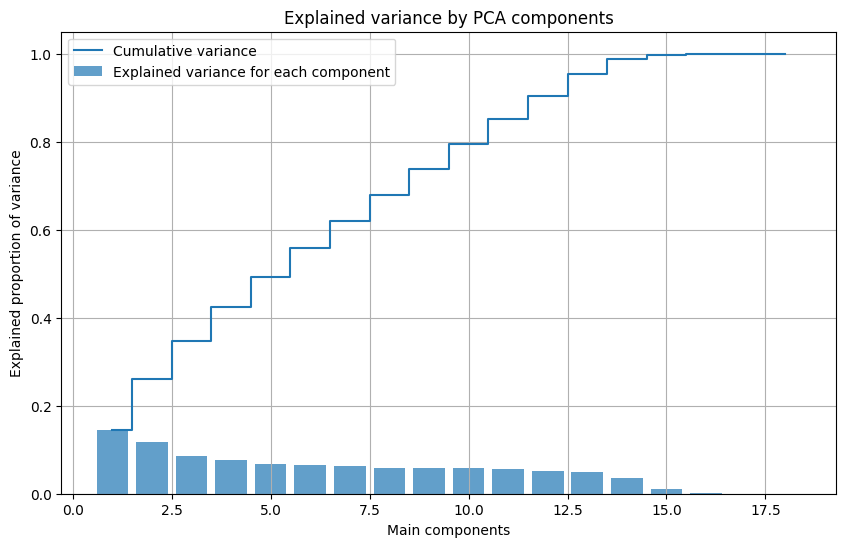

Optimal number of main components: 13
Reduced dataset saved in: 'pca_reduced_dataset.csv'


In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset = pd.read_csv('../dataset_with_has_delay.csv')

# Delete irrelevant columns
columns_to_drop = ['Week', 'Year']
data_for_pca = dataset.drop(columns=columns_to_drop)

# Standarize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Explained variance for each component')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative variance')
plt.xlabel('Main components')
plt.ylabel('Explained proportion of variance')
plt.title('Explained variance by PCA components')
plt.legend(loc='best')
plt.grid()
plt.show()

# Find the optimal number of components
optimal_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Optimal number of main components: {optimal_components}")

# Apply PCA with the optimal number of components
pca_limited = PCA(n_components=optimal_components)
reduced_data = pca_limited.fit_transform(scaled_data)

# Save the reduced dataset
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(optimal_components)])
reduced_df.to_csv('pca_reduced_dataset.csv', index=False)
print("Reduced dataset saved in: 'pca_reduced_dataset.csv'")


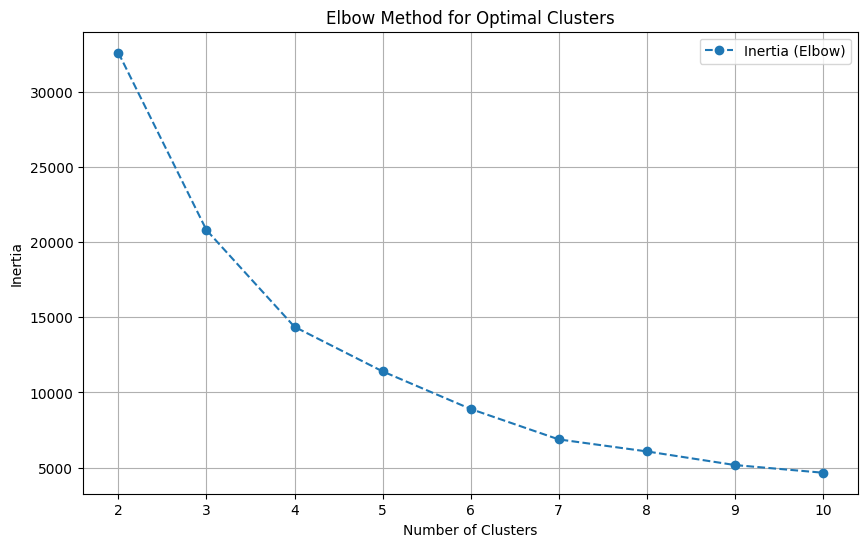

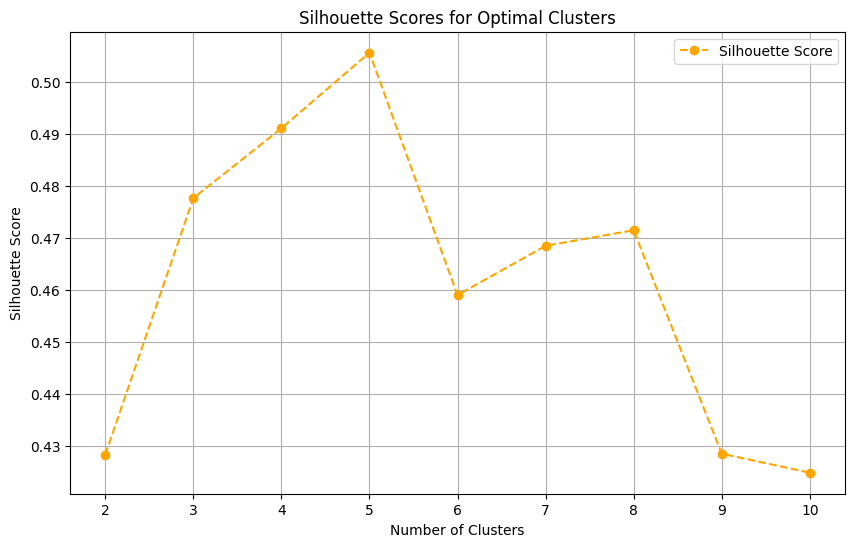

Optimal number of clusters based on Silhouette Score: 5


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use the PCA-transformed data for clustering
pca_2d = reduced_data[:, :2]  # Use first 2 components for simplicity

# Evaluate inertia (Elbow Method)
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test between 2 and 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_2d, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', label='Inertia (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

# Identify best number of clusters from silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")


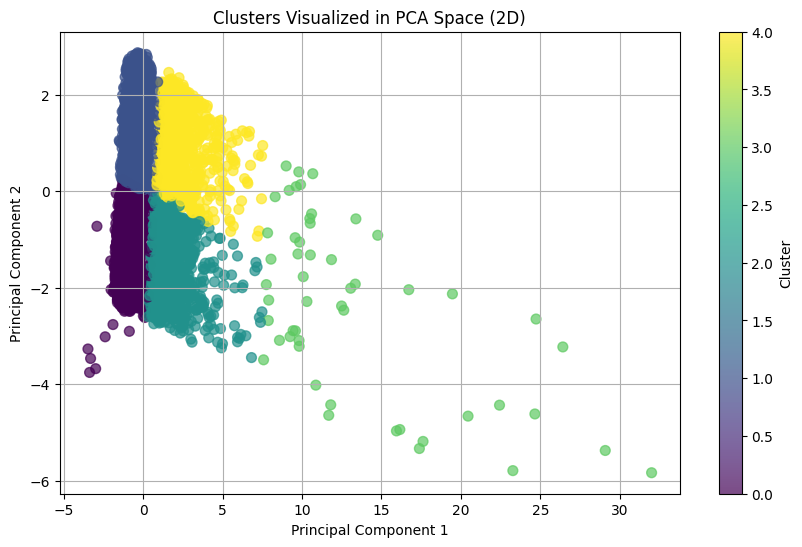

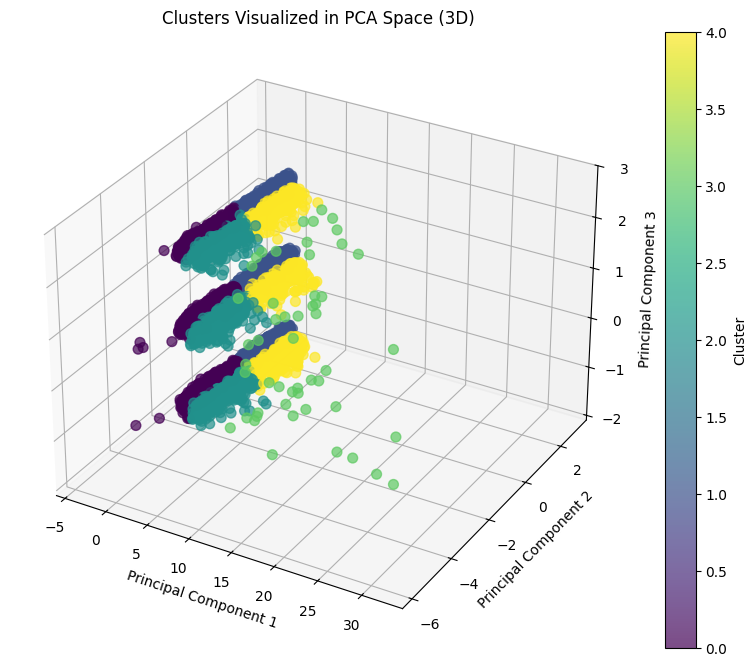

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use the first 2 components for visualization
pca_2d = reduced_data[:, :2]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(pca_2d)
labels = kmeans.labels_

# Visualize the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualized in PCA Space (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Visualize in 3D (using first 3 components)
pca_3d = reduced_data[:, :3]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
ax.set_title('Clusters Visualized in PCA Space (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster')
plt.show()
